In [1]:
import pandas as pd


# Load and preprocess crime dataset
crime = pd.read_csv("recorded_crime_incidents.csv")

crime.head()


,Statistic Label,Quarter,Garda Division,Type of Offence,UNIT,VALUE
0,Recorded crime incidents,2020Q1,Cavan/Monaghan Garda Division,Homicide & related offences (01),Number,0.0
1,Recorded crime incidents,2020Q1,Cavan/Monaghan Garda Division,Murder (0111),Number,0.0
2,Recorded crime incidents,2020Q1,Cavan/Monaghan Garda Division,Manslaughter (0112),Number,0.0
3,Recorded crime incidents,2020Q1,Cavan/Monaghan Garda Division,Infanticide (0113),Number,0.0
4,Recorded crime incidents,2020Q1,Cavan/Monaghan Garda Division,Dangerous driving leading to death (012),Number,0.0


In [3]:
# Extract year from quarter field (e.g., 2020Q1 → 2020)

crime["year"] = crime["Quarter"].str[:4].astype(int)


In [7]:
# Aggregate crime per division per year

crime_yearly = (
    crime
    .groupby(["Garda Division", "year"])["VALUE"]
    .sum()
    .reset_index()
)

crime_yearly.head()


,Garda Division,year,VALUE
0,Cavan/Monaghan Garda Division,2020,14473.0
1,Cavan/Monaghan Garda Division,2021,14077.0
2,Cavan/Monaghan Garda Division,2022,13607.0
3,Cavan/Monaghan Garda Division,2023,12984.0
4,Cavan/Monaghan Garda Division,2024,12280.0


In [11]:
# Rename columns for SQL consistency

crime_yearly.rename(columns={
    "Garda Division": "garda_division",
    "VALUE": "total_crime"
}, inplace=True)


In [13]:
crime_yearly.shape


(168, 3)

In [15]:
crime_yearly.to_csv("crime_yearly.csv", index=False)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load final alaytical dataset
df = pd.read_csv("rent_crime_analysis.csv")

# Quick inspection
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       126 non-null    object 
 1   year         126 non-null    int64  
 2   avg_rent     126 non-null    float64
 3   total_crime  126 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 4.1+ KB


In [3]:
df.describe()

,year,avg_rent,total_crime
count,126.000000,126.000000,126.000000
mean,2022.500000,1068.798810,25845.515873
std,1.714643,330.227925,43766.899216
min,2020.000000,546.740000,5623.000000
25%,2021.000000,826.767500,10639.750000
50%,2022.500000,1029.145000,14030.000000
75%,2024.000000,1224.042500,18111.250000
max,2025.000000,2283.630000,233685.000000


In [5]:
# Rent Growth calculation

rent_growth = (
    df.pivot(index="region", columns="year", values="avg_rent")
)

rent_growth["rent_growth_pct"] = (
    (rent_growth[2025] - rent_growth[2020]) /
    rent_growth[2020] * 100
)

rent_growth = rent_growth.sort_values("rent_growth_pct", ascending=False)

rent_growth[["rent_growth_pct"]].head()

year,rent_growth_pct
region,
Cavan/Monaghan,68.004216
Roscommon/Longford,67.920719
Donegal,63.318945
Sligo/Leitrim,62.995913
Mayo,59.526649


In [7]:
# Crime Growth calculation

crime_growth = (
    df.pivot(index="region", columns="year", values="total_crime")
)

crime_growth["crime_growth_pct"] = (
    (crime_growth[2025] - crime_growth[2020]) /
    crime_growth[2020] * 100
)

crime_growth = crime_growth.sort_values("crime_growth_pct", ascending=False)

crime_growth[["crime_growth_pct"]].head()

year,crime_growth_pct
region,
Mayo,1.313119
Wexford,-8.408904
Westmeath,-9.479857
Kilkenny/Carlow,-16.628818
Kerry,-19.395405


In [9]:
# Calculate Pearson correlation between rent and total crime
# Note: Crime is measured in absolute values, not per capita

correlation = df["avg_rent"].corr(df["total_crime"])
print("Correlation:", correlation)

Correlation: 0.6721139219500776


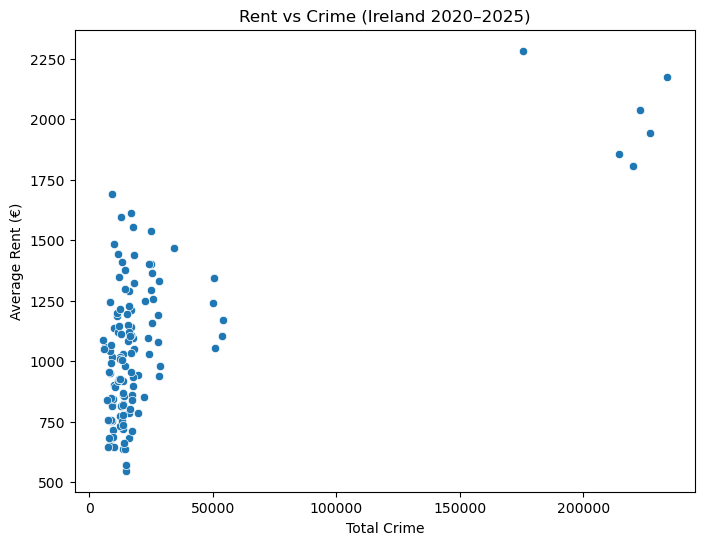

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="total_crime", y="avg_rent")

plt.title("Rent vs Crime (Ireland 2020–2025)")
plt.xlabel("Total Crime")
plt.ylabel("Average Rent (€)")
plt.show()

In [13]:
crime_growth

year,2020,2021,2022,2023,2024,2025,crime_growth_pct
region,,,,,,,
Mayo,8377,9103,8381,8258,8367,8487,1.313119
Wexford,13343,13644,13983,14357,15653,12221,-8.408904
Westmeath,9209,9701,11510,12564,11889,8336,-9.479857
Kilkenny/Carlow,13651,13700,12530,13489,13010,11381,-16.628818
Kerry,12405,12375,13577,13870,13611,9999,-19.395405
Dublin,220078,214390,226816,222946,233685,175547,-20.234190
Tipperary,16281,17204,19837,22111,19813,12696,-22.019532
Sligo/Leitrim,7726,8178,7527,7277,8009,5973,-22.689619
Kildare,22469,25206,25660,24209,25033,17113,-23.837287


In [15]:
rent_growth

year,2020,2021,2022,2023,2024,2025,rent_growth_pct
region,,,,,,,
Cavan/Monaghan,635.740,659.590,735.875,814.985,924.940,1068.070,68.004216
Roscommon/Longford,646.305,687.890,756.415,848.180,992.920,1085.280,67.920719
Donegal,546.740,572.430,637.150,720.060,820.970,892.930,63.318945
Sligo/Leitrim,643.510,680.245,755.590,839.620,956.960,1048.895,62.995913
Mayo,654.060,683.340,753.650,835.880,950.830,1043.400,59.526649
Kerry,733.460,773.800,860.810,918.750,1030.170,1137.790,55.126387
Limerick,939.050,980.230,1079.840,1190.230,1331.600,1438.530,53.189926
Westmeath,814.480,845.000,918.180,1010.420,1121.450,1243.540,52.679010
Wexford,751.450,778.980,856.130,978.610,1084.320,1147.100,52.651540


## Observations

- Rent increased consistently across most regions.
- Crime growth remained relatively stable.
- Correlation coefficient (r = 0.67) suggests moderate positive association.
- This relationship is likely driven by population density rather than direct causality.